In [1]:
!pip3 install nltk

In [2]:
!pip3 install wordcloud

### Our goal is to use twitter data to create a dictnoray

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

import nltk 
import string
import re

In [4]:
#Importing the data

twitter_df = pd.read_csv("./twitter_complete.csv")
twitter_df.head()

,Unnamed: 0,id,tweets,likes,created_at,num_retweets,hashtags,symbols,user_mentions,urls,media
0,0,1363864860916908036,"Welcome back, @calvo05oficial 😅 https://t.co/B...",81,2021-02-22 14:54:56,6,[],[],"[{'screen_name': 'calvo05oficial', 'name': 'Fr...",[],"[{'id': 1363864642100027392, 'id_str': '136386..."
1,1,1363540166086959111,Where Chicago comes to play 🗓 2.25 https://t.c...,225,2021-02-21 17:24:43,23,[],[],[],[],"[{'id': 1363503908061143042, 'id_str': '136350..."
2,2,1362894651657777155,@IndianaMSOC 🔥🔥,3,2021-02-19 22:39:40,0,[],[],"[{'screen_name': 'IndianaMSOC', 'name': ""India...",[],NaN
3,3,1362829516331220994,RT @VamosFire: Mauricio Pineda platicó con @Te...,0,2021-02-19 18:20:51,5,[],[],"[{'screen_name': 'VamosFire', 'name': 'Chicago...",[],NaN
4,4,1362424575502520324,Have a young artist at home? We've got the per...,49,2021-02-18 15:31:46,10,[],[],[],"[{'url': 'https://t.co/mPY6TKeXSy', 'expanded_...",NaN


In [5]:
#Simple stats on the likes
twitter_df['likes'].describe()

count    3232.000000
mean       93.379332
std       194.969857
min         0.000000
25%        14.000000
50%        47.500000
75%       103.000000
max      4422.000000
Name: likes, dtype: float64

<AxesSubplot:xlabel='likes', ylabel='Count'>

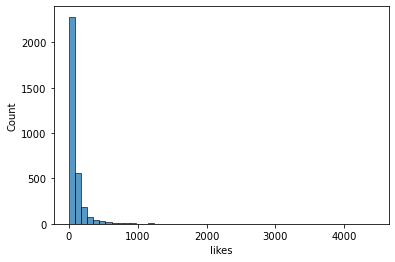

In [6]:
#Overall dist plot of likes
sns.histplot(twitter_df['likes'], bins=50)

<AxesSubplot:xlabel='likes', ylabel='Count'>

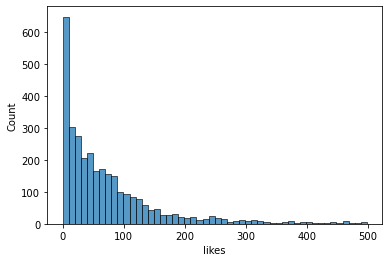

In [7]:
#Subplot from 0 - 500 likes
sns.histplot(twitter_df[twitter_df['likes'] < 500].likes, bins=50,)

In [8]:
#Retweet analysis
twitter_df['num_retweets'].describe()

count     3232.000000
mean        32.706683
std        753.426669
min          0.000000
25%          2.000000
50%          6.000000
75%         13.000000
max      41898.000000
Name: num_retweets, dtype: float64

<AxesSubplot:xlabel='num_retweets', ylabel='Count'>

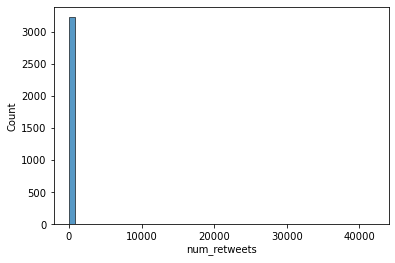

In [9]:
sns.histplot(twitter_df['num_retweets'], bins=50)

<AxesSubplot:xlabel='num_retweets', ylabel='Count'>

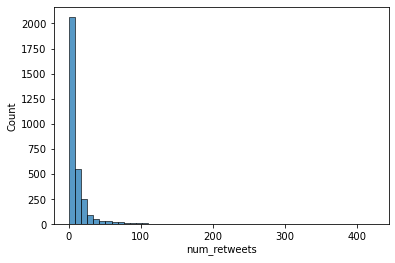

In [10]:
sns.histplot(twitter_df[twitter_df['num_retweets'] < 500].num_retweets, bins=50)

# Cleaning the twitter data

In [11]:
#helper functions
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [12]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = text.split()
    text = [word for word in text if word not in stopword]
    return text

In [13]:
def cleaning_data(tweet_data_text):
    
    #Clean the data
    tweet_data_text['tweets'] = tweet_data_text['tweets'].apply(clean_text)
    
    #Remove emojis
    tweet_data_text['tweets'] = tweet_data_text['tweets'].apply(remove_emoji)
    
    tweet_data_text['tweets'] = tweet_data_text['tweets'].apply(remove_stopwords)
    
    return tweet_data_text['tweets']


In [22]:
tweet_data_text = twitter_df.copy()

cleaned_data = cleaning_data(tweet_data_text)

In [24]:
cleaned_data

0                                         [welcome, back]
1                                  [chicago, comes, play]
2                                           [indianamsoc]
3       [rt, vamosfire, mauricio, pineda, platicó, con...
4       [young, artist, home, weve, got, perfect, proj...
                              ...                        
3227          [adidassoccer, bschweinsteiger, fuel, fire]
3228      [good, luck, players, usynt, bring, home, boys]
3229                  [basti, rooney, saturday, seatgeek]
3230                                     [future, bright]
3231    [orlandocitysc, atletienglish, fccincinnati, c...
Name: tweets, Length: 3232, dtype: object

### Visualizing the cleaned data

In [32]:
all_words = []
for text in cleaned_data:
    for word in text:
        all_words.append(word)
        

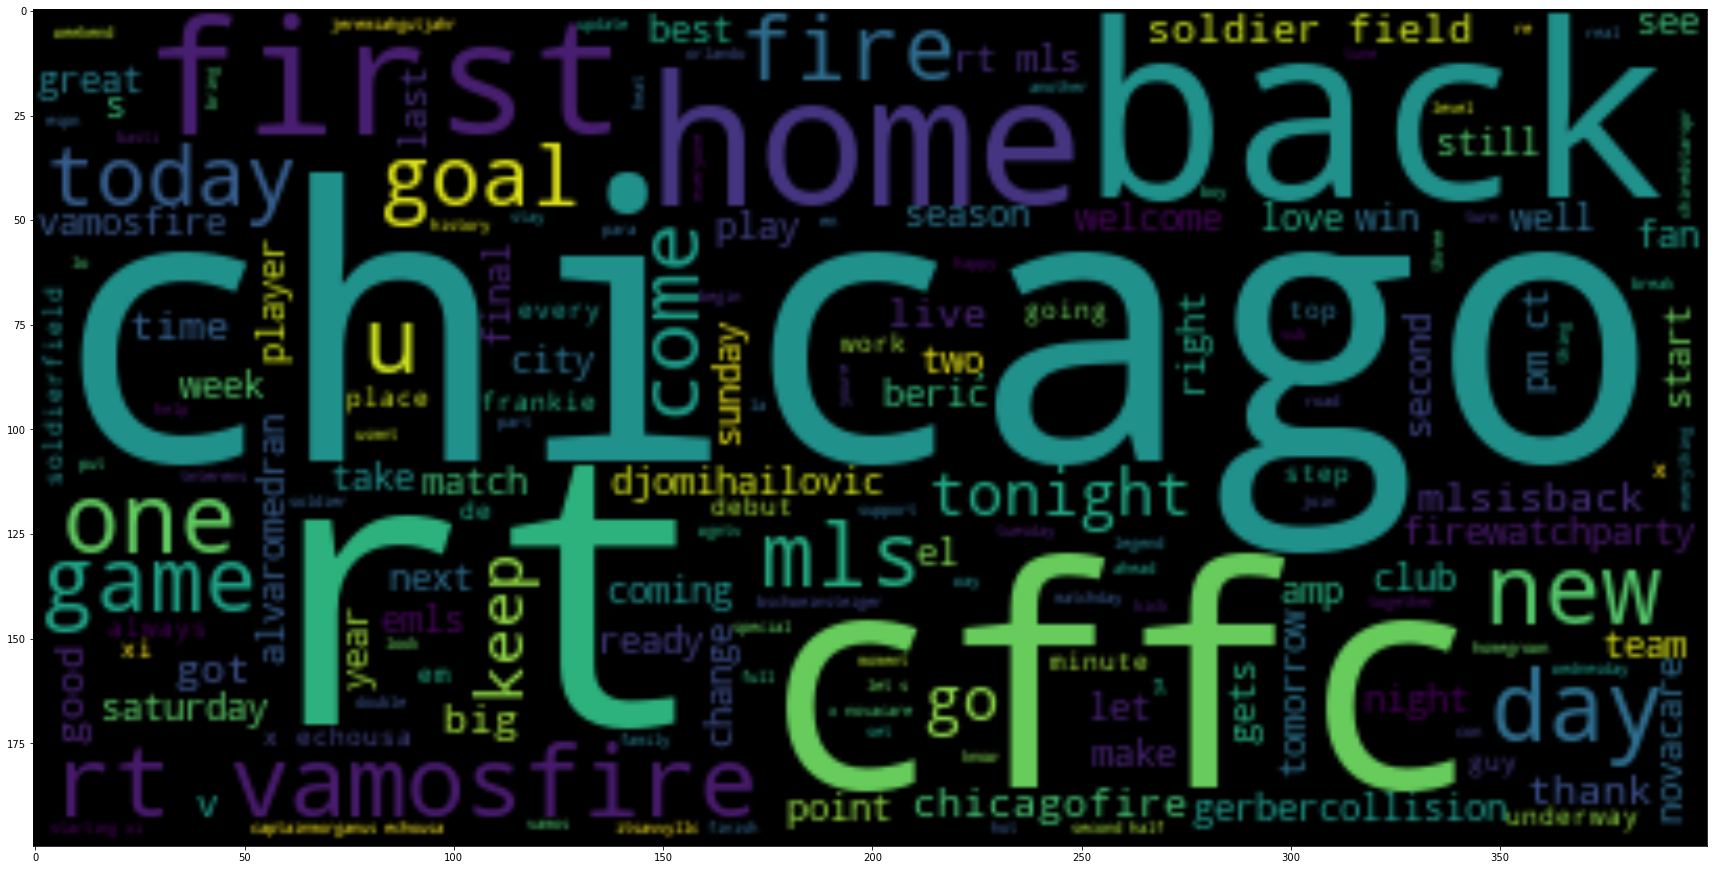

In [37]:
plt.figure(figsize=(30,30))
all_words_string = " ".join(text for text in all_words)
wordcloud = WordCloud(background_color="black").generate(all_words_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Checking the frequency 

In [38]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [42]:
fdist = FreqDist(word for word in word_tokenize(all_words_string))

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/saitejas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [83]:
freq_df = pd.DataFrame.from_dict(fdist, orient='index')
freq_df.columns = ['Frequency']
freq_df.index.name = "word"
freq_df = freq_df.sort_values(by="Frequency", ascending=False)
print(freq_df)

              Frequency
word                   
rt                  327
chicago             179
cffc                144
back                142
x                   138
...                 ...
separates             1
jeremymikula          1
basement              1
prairie               1
realsaltlake          1

[4896 rows x 1 columns]


In [84]:
freq_df.to_csv('frequecy_distribution.csv')